# Closest Pair of Points Coding Challenge

In [0]:
import numpy as np
import matplotlib.pyplot as plt 

This exercise builds on the same ideas covered in the last one, so feel free to reuse any functions. Today we'll start by defining a function that takes
in a number of dimensions (call it n) and spits out a random vector n-dimensional vector. Each component of the vector should be randomly pulled from a
normal distribution with mean 0 and standard deviation 1.

In [0]:
# Function that generates a n-dimensional vector from a normal distribution

def rand_vec(mean, stdev, n):
    return list(np.random.normal(mean, stdev, n))

def dis(a, b):
      return np.sqrt(sum((a[i] - b[i])**2 for i in range(len(a))))

Now generate a list of 50 vectors in 50-dimensional space. Call the list vec_list.

In [0]:
# vec_list = 50 vectors in 50 dimensional space

vec_list = np.asarray([rand_vec(0, 1, 50) for i in range(50)])

# vec_list2 = 50 vectors in 2 dimensional space

vec_list2 = np.asarray([rand_vec(0, 1, 2) for i in range(5)])

To every two vectors v1 and v2, recall how we calculate the distance bewteen v1 and v2. With that in mind, find the two
vectors closest to one another and print the distance between them. Hint: the answer isn't zero. 

[Closest pair of points problem](https://en.wikipedia.org/wiki/Closest_pair_of_points_problem)

50D min:  7.042028134876942
0.7843339274155832


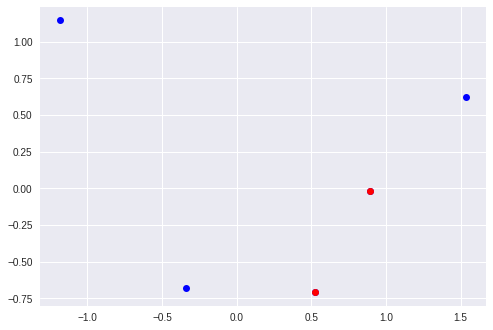

In [0]:
# Implementation of Closest Pair of Points algorithm

from scipy.spatial.distance import cdist

def minmax(v):
  dis = cdist(v, v)  # Computes distance between each pair of the two collections of inputs.
  num = v.shape[0]          # number of samples

  # Select d(a_i,a_j), i != j without repetitions
  il1 = np.tril_indices(num, k=-1) # computes bottom triangle of a matrix
  dist = dis[il1]                  # bottom triangle of the vector matrix
  arg_min = dist.argmin()          # Returns the indices of the minimum values along an axis.
  min = dist.min()
  arg_max = dist.argmax()
  max = dist.max()
  indmin, indmax = np.where(dis == min)[0], np.where(dis == max)[0]
  v1min, v2min, v1max, v2max = v[indmin[0]], v[indmin[1]], v[indmax[0]], v[indmax[1]]
  return [min, v1min, v2min], [max, v1max, v2max]
  
print('50D min: ', minmax(vec_list)[0][0])
  
# ------------------------------------------------------------------------------
  
ans = minmax(vec_list2)

x, y = vec_list2.T
print(ans[0][0])
plt.plot(x,y,'ob', ans[0][1][0], ans[0][1][1], 'or', ans[0][2][0], ans[0][2][1], 'or')
plt.show()

# def brute_force(v):
#   mindis = 1000
#   minpair = []

#   for i in range(len(v)):
#     for j in range(i+1, len(v)):
#       if dis(v[i], v[j]) < mindis:
#         mindis = dis(v[i], v[j])
#         pair = [v[i], v[j]]
#   print(mindis, ': ', pair)
  
# brute_force(vec_list2)
    

Now find the two vectors furthest from one another.

50D max:  13.162252033436003
2.767837903121478


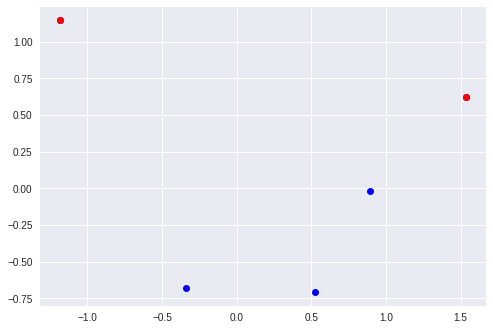

In [0]:
# Inversion of Closest Pair of Points algorithm


print('50D max: ', minmax(vec_list)[1][0])
  
# ------------------------------------------------------------------------------

x, y = vec_list2.T
print(ans[1][0])
plt.plot(x,y,'ob', ans[1][1][0], ans[1][1][1], 'or', ans[1][2][0], ans[1][2][1], 'or')
plt.show()


# maxdis = 0
# maxpair = []

# for i in range(50):
#   for j in range(i+1, 50):
#     if dis(vec_list[i], vec_list[j]) > maxdis:
#       maxdis = dis(vec_list[i], vec_list[j])
#       maxpair = [vec_list[i], vec_list[j]]
# print(maxdis, ': ', maxpair)

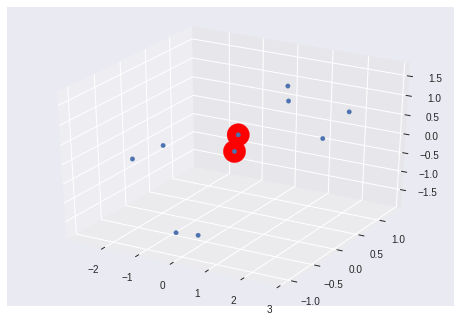

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def get_vec(mean,stddev):
    return np.random.normal(mean,stddev,1)

# Implementation of Closest Pair of Points algorithm
def compute_closest_pair(set_of_points):
    minimum_distance = np.inf; #infinity as a "number"
    best_points = [-1,-1]
    for i in range(set_of_points.shape[0]):
        for j in range(i+1,set_of_points.shape[0]):
            dist = np.linalg.norm(set_of_points[i] - set_of_points[j])
            #print(i,j,dist)
            if(dist < minimum_distance):
                minimum_distance = dist
                best_points = np.array([set_of_points[i],set_of_points[j]])
    return minimum_distance, best_points


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

points_3d = np.random.multivariate_normal(np.zeros(3),np.identity(3),10)
X1, Y1, Z1 = points_3d.T
scatter1 = ax.scatter(X1, Y1, Z1, marker = 'o', alpha=1.0)

distance, best_points = compute_closest_pair(points_3d)
bx, by, bz = best_points.T
scatter2 = ax.scatter(bx, by, bz, color = 'red', marker = 'o', s=500, alpha=1.0)


In [0]:
from matplotlib import animation, rc
from IPython.display import HTML

fig, ax = plt.subplots()
ax2 = fig.add_subplot(111, projection='3d')
plt.close()

X1, Y1, Z1 = points_3d.T
scatter1 = ax2.scatter(X1, Y1, Z1, marker = 'o', alpha=1.0)

distance, best_points = compute_closest_pair(points_3d)
bx, by, bz = best_points.T
scatter2 = ax2.scatter(bx, by, bz, color = 'red', marker = 'o', s=500, alpha=1.0)

FRAMES = 100
INITIAL_ELEV = 30
INITIAL_AZIMUTH = -37.5

def animate(i):
  ax2.view_init(INITIAL_ELEV, INITIAL_AZIMUTH + i/FRAMES*360)
  return (scatter1,)
  
ani = animation.FuncAnimation(fig, animate, frames=FRAMES, interval=100, repeat=False) 

rc('animation', html='jshtml')
ani
  